<h1>Network of Reddit Users with Negative Sentiments</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: casualphilosopher1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('./Reddit_Sentiments/anti_lockdown_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity
0,0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,schu4KSU,People like this everywhere in the world. Dif...,1,positive
1,1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,StupidizeMe,"Well, there's certainly enough of them to caus...",0,positive
2,2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Eltharion-the-Grim,They are largely absent from Asia. The only pl...,0,neutral
3,3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Thisam,"Yup, the percentage of population who are easi...",0,neutral
4,4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,Short answer: Yes. Look at the USA and how Bre...,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1057,0,ntvv7b,signed7,Anti-lockdown march in Montreal draws several ...,617,152,1.623014e+09,2021-06-07 05:16:18,tmleafsfan,What's wrong with these people? Where's the cu...,1,negative
1058,1058,0,ntvv7b,signed7,Anti-lockdown march in Montreal draws several ...,617,152,1.623014e+09,2021-06-07 05:16:18,sec5,"Over time , they slowly became infected by Ame...",0,neutral
1059,1059,0,ntvv7b,signed7,Anti-lockdown march in Montreal draws several ...,617,152,1.623014e+09,2021-06-07 05:16:18,lostandfound8888,Don't worry hockey riots are coming (we can mu...,0,positive
1060,1060,0,ntvv7b,signed7,Anti-lockdown march in Montreal draws several ...,617,152,1.623014e+09,2021-06-07 05:16:18,NaN,[removed],1,neutral


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,casualphilosopher1,schu4KSU,People like this everywhere in the world. Dif...,Undirected,1
1,casualphilosopher1,StupidizeMe,"Well, there's certainly enough of them to caus...",Undirected,1
2,casualphilosopher1,Eltharion-the-Grim,They are largely absent from Asia. The only pl...,Undirected,1
3,casualphilosopher1,Thisam,"Yup, the percentage of population who are easi...",Undirected,1
4,casualphilosopher1,NaN,Short answer: Yes. Look at the USA and how Bre...,Undirected,1
...,...,...,...,...,...
1057,signed7,tmleafsfan,What's wrong with these people? Where's the cu...,Undirected,1
1058,signed7,sec5,"Over time , they slowly became infected by Ame...",Undirected,1
1059,signed7,lostandfound8888,Don't worry hockey riots are coming (we can mu...,Undirected,1
1060,signed7,NaN,[removed],Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight
992,signed7,NaN,[deleted],Undirected,1
993,signed7,NaN,[removed],Undirected,1
994,signed7,wittedsownder,"""Anti-lockdown"" is the term used but what it i...",Undirected,1
995,signed7,ohsnapitsnathan,">“There is no pandemic,” Frank, a military vet...",Undirected,1
996,signed7,sjgirjh9orj,there might be no brain in his head,Undirected,1
...,...,...,...,...,...
1057,signed7,tmleafsfan,What's wrong with these people? Where's the cu...,Undirected,1
1058,signed7,sec5,"Over time , they slowly became infected by Ame...",Undirected,1
1059,signed7,lostandfound8888,Don't worry hockey riots are coming (we can mu...,Undirected,1
1060,signed7,NaN,[removed],Undirected,1


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,DoremusJessup,ALL_HALLOWS_EVE-,1
1,DoremusJessup,A_Vinegar_Taster,1
2,DoremusJessup,AutoModerator,1
3,DoremusJessup,Candour_Pendragon,2
4,DoremusJessup,Feanorer,1
...,...,...,...
763,vostok-Abdullah,whichwitch9,1
764,vostok-Abdullah,yeetingAnyone,1
765,vostok-Abdullah,zeeeee,1
766,vostok-Abdullah,zephyreblk,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
297,casualphilosopher1,Blueskiesbroken97,6
717,signed7,lostandfound8888,5
292,casualphilosopher1,AutoModerator,5
607,mfbrucee,bronet,5
586,mfbrucee,Jacc3,4


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 741 nodes and 768 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.3454790823211877

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 31 nodes and 45 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(network, weight='weight', iterations=20, k=4)

<ipython-input-14-c235fc96ccbe>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


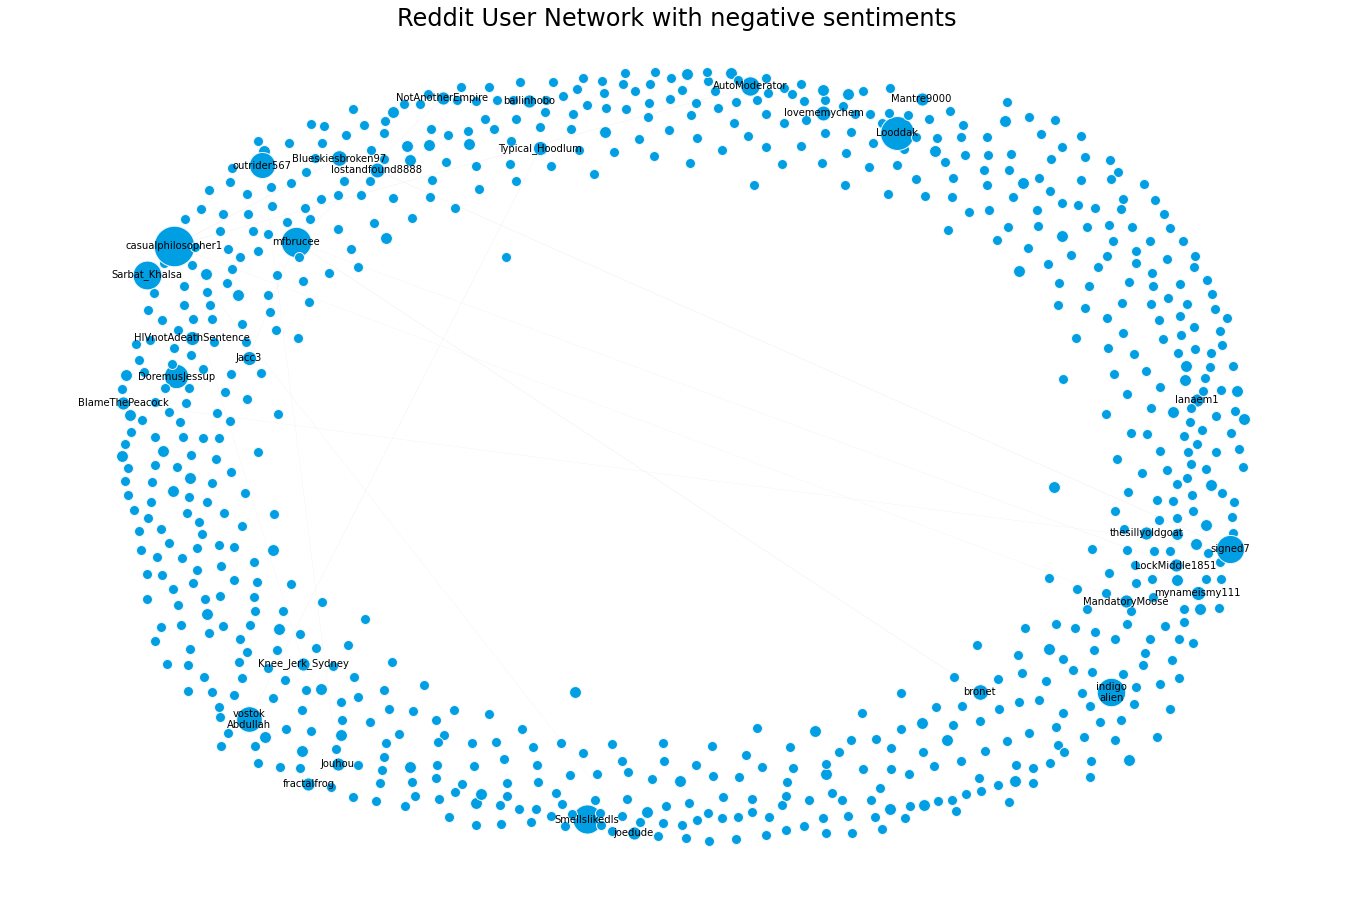

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in network.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(network, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(network, pos, {n:n.replace('-','\n') for n in network.nodes() if weighted_degrees[n]>2.35},font_size=10);

for e in network.edges(data=True):
    if e[2]['weight']>2.35:
        nx.draw_networkx_edges(network, pos,[e], width=e[2]['weight']/100, edge_color='#707070')
        
fig.set_size_inches(figsize * 4)
fig.show()

In [15]:
# Most negative user and its comments

author = reddit_sentiments[(reddit_sentiments['author'] == 'casualphilosopher1') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity
4,4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,Short answer: Yes. Look at the USA and how Bre...,0,negative
12,12,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Embarrassed_Proposal,Florida (where I live) is another global cente...,0,negative
17,17,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Videoboysayscube,"I just can't, in my wildest imagination, compr...",1,negative
19,19,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,> We have dead bodies. Do they think these peo...,0,negative
21,21,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,krisco204,Its not their fault. Those people are actually...,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,303,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,Fucking dumbass idiots believing in fake news....,1,negative
307,307,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Pineapplegal25,Look! Stupid people who aren’t American!,1,negative
313,313,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Beer-Me,I wonder how large of an uptick London metro w...,1,negative
315,315,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,resetmyself,These protests violate the mask mandate. They...,1,negative


In [16]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  31
Number of edges in subGraph:  45
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('Sarbat_Khalsa', 2), ('mfbrucee', 11), ('joedude', 1), ('thesillyoldgoat', 3), ('Knee_Jerk_Sydney', 1), ('indigo-alien', 9), ('lostandfound8888', 1), ('BlameThePeacock', 1), ('bronet', 2), ('mynameismy111', 2), ('outrider567', 3), ('LockMiddle1851', 1), ('ballinhobo', 3), ('casualphilosopher1', 8), ('Looddak', 4), ('AutoModerator', 7), ('HIVnotAdeathSentence', 3), ('Typical_Hoodlum', 1), ('Blueskiesbroken97', 1), ('NotAnotherEmpire', 1), ('lovememychem', 3), ('Jacc3', 1), ('MandatoryMoose', 1), ('DoremusJessup', 2), ('Jouhou', 1), ('lanaem1', 3), ('vostok-Abdullah', 4), ('fractalfrog', 2), ('signed7', 4), ('Smellslikedls', 3), ('Mantre9000', 1)]
Nodes' Degree Centrality (Normalized) in subGraph:  {'Sarbat_Khalsa': 0.06666666666666667, 'mfbrucee': 0.36666666666666664, 'joedude': 0.03333333333333333, 'thesillyoldgoat': 0.1, 'Knee_Jerk_Sydney': 0.03333333333333333, '

In [17]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'Sarbat_Khalsa': 0.27522935779816515, 'mfbrucee': 0.45454545454545453, 'joedude': 0.2857142857142857, 'thesillyoldgoat': 0.35714285714285715, 'Knee_Jerk_Sydney': 0.2857142857142857, 'indigo-alien': 0.44776119402985076, 'lostandfound8888': 0.27522935779816515, 'BlameThePeacock': 0.27522935779816515, 'bronet': 0.3191489361702128, 'mynameismy111': 0.3333333333333333, 'outrider567': 0.3, 'LockMiddle1851': 0.3157894736842105, 'ballinhobo': 0.30927835051546393, 'casualphilosopher1': 0.39473684210526316, 'Looddak': 0.38461538461538464, 'AutoModerator': 0.5263157894736842, 'HIVnotAdeathSentence': 0.36585365853658536, 'Typical_Hoodlum': 0.26548672566371684, 'Blueskiesbroken97': 0.2857142857142857, 'NotAnotherEmpire': 0.3157894736842105, 'lovememychem': 0.379746835443038, 'Jacc3': 0.3157894736842105, 'MandatoryMoose': 0.2857142857142857, 'DoremusJessup': 0.38461538461538464, 'Jouhou': 0.23255813953488372, 'lanaem1': 0.3409090909090909, 'vostok-Abdullah'

In [18]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.0967741935483871
Network Diameter in subGraph:  6
Network Average path length in subGraph:  3.0688172043010753


In [19]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  30
Current node is Sarbat_Khalsa  and node-level reachability is 1.0
{'joedude', 'mfbrucee', 'thesillyoldgoat', 'Knee_Jerk_Sydney', 'indigo-alien', 'lostandfound8888', 'BlameThePeacock', 'bronet', 'mynameismy111', 'outrider567', 'LockMiddle1851', 'ballinhobo', 'casualphilosopher1', 'Looddak', 'AutoModerator', 'HIVnotAdeathSentence', 'Typical_Hoodlum', 'Blueskiesbroken97', 'NotAnotherEmpire', 'lovememychem', 'Jacc3', 'MandatoryMoose', 'DoremusJessup', 'Jouhou', 'lanaem1', 'vostok-Abdullah', 'fractalfrog', 'signed7', 'Smellslikedls', 'Mantre9000'}
Current node is mfbrucee  and node-level reachability is 1.0
{'joedude', 'Sarbat_Khalsa', 'thesillyoldgoat', 'Knee_Jerk_Sydney', 'indigo-alien', 'lostandfound8888', 'BlameThePeacock', 'bronet', 'mynameismy111', 'outrider567', 'LockMiddle1851', 'ballinhobo', 'casualphilosopher1', 'Looddak', 'AutoModerator', 'HIVnotAdeathSentence', 'Typical_Hoodlum', 'Blueskiesbroken97', 'NotAnotherEmpire', 'lovememychem', 